https://hniu-83853.medium.com/exploratory-data-analysis-how-was-raptors-performance-on-home-and-away-games-a5278bb82442

EDA Example with blog post on medium

Dataset can be found in the github repo - https://github.com/KevinNiuHaoyang/EDA-Project



In [3]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib as mpl
import matplotlib.pyplot as plt
import warnings
from datetime import datetime

In [4]:
# First import the csv file and tranform it into dataframe 
csv=pd.read_csv("games2020.csv")
dfgame = pd.DataFrame(csv)
dfgame.info()
dfgame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1176 entries, 0 to 1175
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GAME_DATE_EST      1176 non-null   object 
 1   GAME_ID            1176 non-null   int64  
 2   GAME_STATUS_TEXT   1176 non-null   object 
 3   HOME_TEAM_ID       1176 non-null   int64  
 4   HOME_TEAM_NAME     1176 non-null   object 
 5   VISITOR_TEAM_ID    1176 non-null   int64  
 6   VISITOR_TEAM_NAME  1176 non-null   object 
 7   SEASON             1176 non-null   int64  
 8   TEAM_ID_home       1176 non-null   int64  
 9   PTS_home           1176 non-null   int64  
 10  FG_PCT_home        1176 non-null   float64
 11  FT_PCT_home        1176 non-null   float64
 12  FG3_PCT_home       1176 non-null   float64
 13  AST_home           1176 non-null   int64  
 14  REB_home           1176 non-null   int64  
 15  TEAM_ID_away       1176 non-null   int64  
 16  PTS_away           1176 

,GAME_DATE_EST,GAME_ID,GAME_STATUS_TEXT,HOME_TEAM_ID,HOME_TEAM_NAME,VISITOR_TEAM_ID,VISITOR_TEAM_NAME,SEASON,TEAM_ID_home,PTS_home,FG_PCT_home,FT_PCT_home,FG3_PCT_home,AST_home,REB_home,TEAM_ID_away,PTS_away,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS
0,10/11/20,41900406,Final,1610612748,Heat,1610612747,Lakers,2019,1610612748,93,0.443,0.591,0.357,25,41,1610612747,106,0.483,0.643,0.314,23,46,0
1,10/9/20,41900405,Final,1610612747,Lakers,1610612748,Heat,2019,1610612747,108,0.463,0.857,0.368,21,41,1610612748,111,0.458,0.955,0.424,26,35,0
2,10/6/20,41900404,Final,1610612748,Heat,1610612747,Lakers,2019,1610612748,96,0.427,0.808,0.344,18,39,1610612747,102,0.443,0.857,0.359,25,42,0
3,10/4/20,41900403,Final,1610612748,Heat,1610612747,Lakers,2019,1610612748,115,0.513,0.913,0.353,25,37,1610612747,104,0.430,0.759,0.333,23,43,1
4,10/2/20,41900402,Final,1610612747,Lakers,1610612748,Heat,2019,1610612747,124,0.505,0.588,0.340,32,44,1610612748,114,0.507,0.912,0.407,29,37,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1171,10/23/19,21900011,Final,1610612762,Jazz,1610612760,Thunder,2019,1610612762,100,0.444,0.700,0.250,15,49,1610612760,95,0.386,0.677,0.370,15,48,1
1172,10/23/19,21900012,Final,1610612756,Suns,1610612758,Kings,2019,1610612756,124,0.500,0.833,0.333,31,44,1610612758,95,0.391,0.654,0.345,17,47,1
1173,10/23/19,21900013,Final,1610612757,Trail Blazers,1610612743,Nuggets,2019,1610612757,100,0.414,0.913,0.250,13,48,1610612743,108,0.420,0.815,0.563,24,45,0
1174,10/22/19,21900001,Final,1610612761,Raptors,1610612740,Pelicans,2019,1610612761,130,0.408,0.842,0.350,23,57,1610612740,122,0.422,0.850,0.422,30,53,1


In [5]:
#Change the str object to datetime for further usage.

gamedates = pd.to_datetime(dfgame["GAME_DATE_EST"])
dfgame['GAME_DATE_EST']=gamedates
dfgame.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1176 entries, 0 to 1175
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   GAME_DATE_EST      1176 non-null   datetime64[ns]
 1   GAME_ID            1176 non-null   int64         
 2   GAME_STATUS_TEXT   1176 non-null   object        
 3   HOME_TEAM_ID       1176 non-null   int64         
 4   HOME_TEAM_NAME     1176 non-null   object        
 5   VISITOR_TEAM_ID    1176 non-null   int64         
 6   VISITOR_TEAM_NAME  1176 non-null   object        
 7   SEASON             1176 non-null   int64         
 8   TEAM_ID_home       1176 non-null   int64         
 9   PTS_home           1176 non-null   int64         
 10  FG_PCT_home        1176 non-null   float64       
 11  FT_PCT_home        1176 non-null   float64       
 12  FG3_PCT_home       1176 non-null   float64       
 13  AST_home           1176 non-null   int64         
 14  REB_home

In [6]:
#clear the data and eluminate the unnecessary columns
#the Game_ID, Game status,home/away team ID, season are not useful, so we will delete them.
del dfgame['GAME_ID']
del dfgame['SEASON']
del dfgame['HOME_TEAM_ID']
del dfgame['GAME_STATUS_TEXT']
del dfgame['VISITOR_TEAM_ID']
del dfgame['TEAM_ID_home']
del dfgame['TEAM_ID_away']

dfgame.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1176 entries, 0 to 1175
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   GAME_DATE_EST      1176 non-null   datetime64[ns]
 1   HOME_TEAM_NAME     1176 non-null   object        
 2   VISITOR_TEAM_NAME  1176 non-null   object        
 3   PTS_home           1176 non-null   int64         
 4   FG_PCT_home        1176 non-null   float64       
 5   FT_PCT_home        1176 non-null   float64       
 6   FG3_PCT_home       1176 non-null   float64       
 7   AST_home           1176 non-null   int64         
 8   REB_home           1176 non-null   int64         
 9   PTS_away           1176 non-null   int64         
 10  FG_PCT_away        1176 non-null   float64       
 11  FT_PCT_away        1176 non-null   float64       
 12  FG3_PCT_away       1176 non-null   float64       
 13  AST_away           1176 non-null   int64         
 14  REB_away

In [7]:
#Rename the columns to make it easier to operate
dfgame.rename(columns={'GAME_DATE_EST': 'Date', 'HOME_TEAM_NAME': 'HomeTeam','VISITOR_TEAM_NAME':'VisitorTeam'},inplace=True)


In [8]:
#slipt the game data into two parts: before and after the covid shut down. 


dfbefore = dfgame.loc[dfgame['Date'] < '3/12/20']
print(dfbefore)

dfafter = dfgame.loc[dfgame['Date'] >'3/12/20']
print(dfafter)

           Date       HomeTeam VisitorTeam  ...  AST_away  REB_away  HOME_TEAM_WINS
205  2020-03-11          76ers     Pistons  ...        25        32               1
206  2020-03-11          Hawks      Knicks  ...        32        47               0
207  2020-03-11           Heat     Hornets  ...        20        50               0
208  2020-03-11      Mavericks     Nuggets  ...        23        40               1
209  2020-03-10         Pacers     Celtics  ...        19        46               0
...         ...            ...         ...  ...       ...       ...             ...
1171 2019-10-23           Jazz     Thunder  ...        15        48               1
1172 2019-10-23           Suns       Kings  ...        17        47               1
1173 2019-10-23  Trail Blazers     Nuggets  ...        24        45               0
1174 2019-10-22        Raptors    Pelicans  ...        30        53               1
1175 2019-10-22       Clippers      Lakers  ...        20        41         

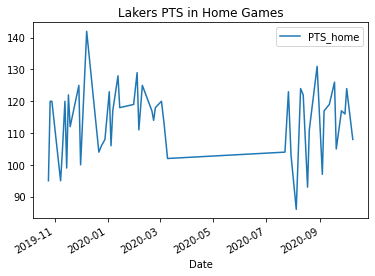

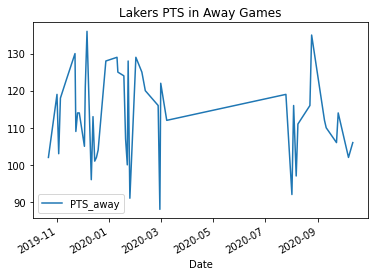

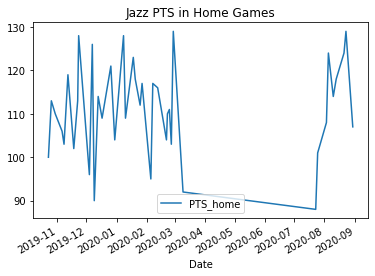

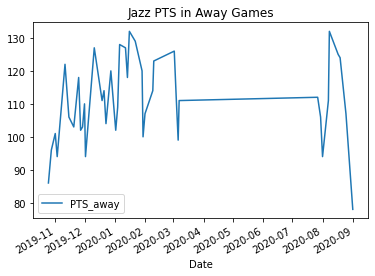

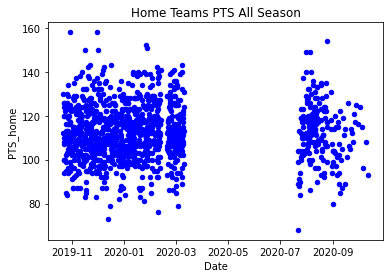

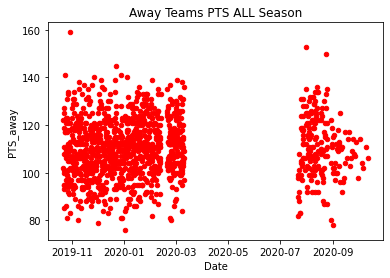

In [11]:
#Play around with the data to see how teams like Lakers and Jazz did in home and away games

dflakers = dfgame.loc[dfgame['HomeTeam'] == 'Lakers']
dflakersaway = dfgame.loc[dfgame['VisitorTeam'] == 'Lakers']

Jazzhome = dfgame.loc[dfgame['HomeTeam'] == 'Jazz']
Jazzaway = dfgame.loc[dfgame['VisitorTeam'] == 'Jazz']

dflakers.plot.line(x='Date',y='PTS_home', title = 'Lakers PTS in Home Games')
dflakersaway.plot.line(x='Date',y='PTS_away',title = 'Lakers PTS in Away Games')

Jazzhome.plot.line(x='Date',y='PTS_home',title = 'Jazz PTS in Home Games')
Jazzaway.plot.line(x='Date',y='PTS_away',title = 'Jazz PTS in Away Games')

# Make two scatter plots to see the overall perfermance of home and away teams
dfgame.plot.scatter(x='Date',y='PTS_home',c="blue",title = 'Home Teams PTS All Season')
dfgame.plot.scatter(x='Date',y='PTS_away',c="red",title = 'Away Teams PTS ALL Season')

112.54545454545455
106.04545454545455


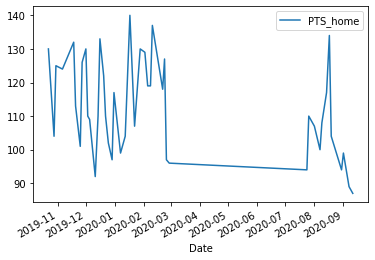

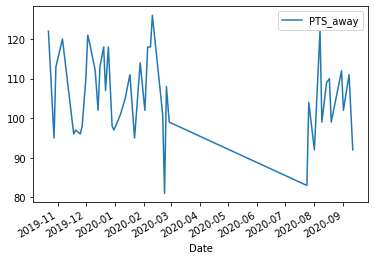

In [23]:
# From now, I would focus on Raptors since it is located in Canada and experienced more travelings when played away games

#First I create two new df for raptors, one for home games, one for away games
Raptorshome = dfgame.loc[dfgame['HomeTeam'] == 'Raptors']
Raptorsaway = dfgame.loc[dfgame['HomeTeam'] == 'Raptors']

#Plot the PTS that Raptors scored in the two dataframe
Raptorshome.plot.line(x='Date',y='PTS_home')
Raptorsaway.plot.line(x='Date',y='PTS_away')

# The calculated mean values for home and away games show that there is a 6.5 difference between home and away games. 
print(Raptorshome['PTS_home'].mean())
print(Raptorsaway['PTS_away'].mean())

115.90625
110.0625
103.58333333333333
115.7


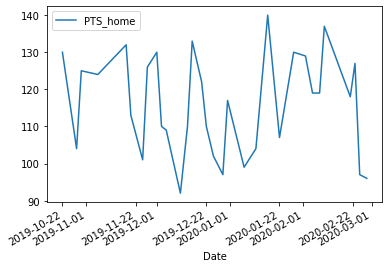

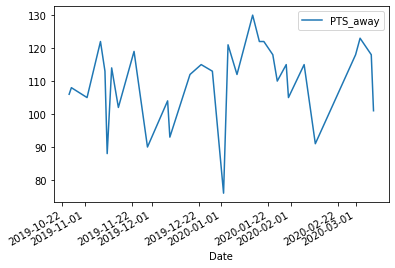

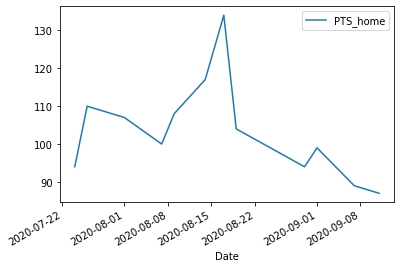

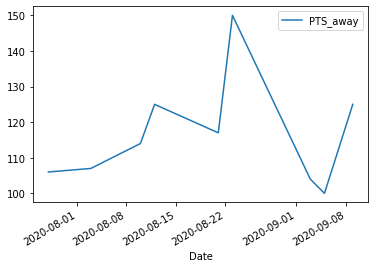

In [13]:
# Since after the game resumed in October, there's no audience and teams no longer need to travel,
# I assume the influence of travelling is gone. 

#rb1 and rb2 means the home and away games before the covid shut down
rb1 = dfbefore.loc[dfbefore['HomeTeam'] == 'Raptors']
rb2 = dfbefore.loc[dfbefore['VisitorTeam'] == 'Raptors']

#ra1 and ra2 means the home and away games after the covid shut down
ra1 = dfafter.loc[dfafter['HomeTeam'] == 'Raptors']
ra2 = dfafter.loc[dfafter['VisitorTeam'] == 'Raptors']

#Create line plots to see how Raptors perform 
rb1.plot.line(x='Date',y='PTS_home')
rb2.plot.line(x='Date',y='PTS_away')

ra1.plot.line(x='Date',y='PTS_home')
ra2.plot.line(x='Date',y='PTS_away')

#Print the calculated average for the home and away games before and after the shut down.
print(rb1['PTS_home'].mean())
print(rb2['PTS_away'].mean())
print(ra1['PTS_home'].mean())
print(ra2['PTS_away'].mean())



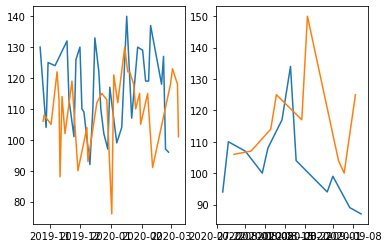

In [14]:
#To make a better comparison, I decided to combine the home and away scores for Raptors


x1 = rb1['Date']
y1 = rb1['PTS_home']



x2 = rb2['Date']
y2 = rb2['PTS_away']

x3 = ra1['Date']
y3 = ra1['PTS_home']

x4 = ra2['Date']
y4 = ra2['PTS_away']

figure,axes = plt.subplots(nrows=1, ncols=2)

#Create two subolots to better compare the stats.
axes[0].plot(x1,y1)
axes[0].plot(x2, y2)


axes[1].plot(x3, y3)
axes[1].plot(x4, y4)

#It is obvious that Raptors scored more points in the home games than the away game before the shut down.
# But after shut down, there is not enough evidence or sign to prove that the home advantage still exists. 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


8.6875
4.21875


(-20.0, 50.0)

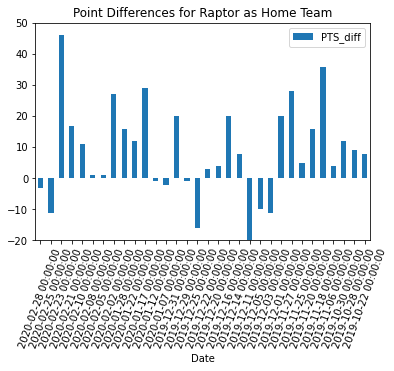

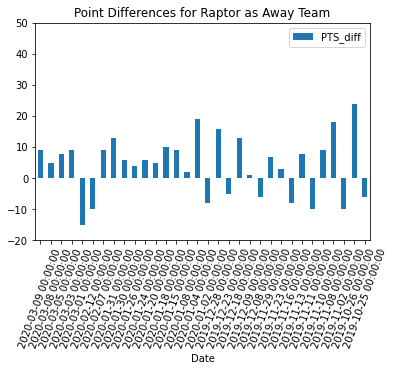

In [16]:
#To make a better analysis on Raptors' perfermanec in home and away games,I came up with another model:
# The point differences each game between home and away team for Raptor 

diff1 = rb1['PTS_home'] - rb1['PTS_away']
rb1['PTS_diff'] = diff1
print(rb1['PTS_diff'].mean())

diff2 =rb2['PTS_away']- rb2['PTS_home'] 
rb2['PTS_diff'] = diff2
print(rb2['PTS_diff'].mean())


# Create two bar charts 
rb1.plot.bar(x='Date', y='PTS_diff',rot = 70, title="Point Differences for Raptor as Home Team")
plt.ylim(-20,50)
rb2.plot.bar(x="Date", y="PTS_diff", rot=70,title="Point Differences for Raptor as Away Team")
plt.ylim(-20,50)




46.0625
44.34375


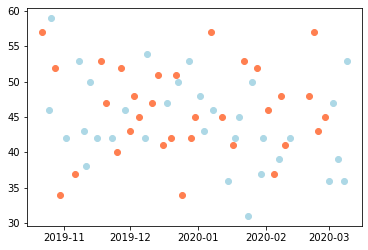

In [19]:
#To further understand the perfermance of Raptors in home and away games
# I deceided to make analysis on other stats such as rebound and assist. 

x = rb1['Date']
y = rb1['REB_home']

plt.scatter(x, y, c='coral')

x = rb2['Date']
y = rb2['REB_away']

plt.scatter(x, y, c='lightblue')

print(rb1['REB_home'].mean())
print(rb2['REB_away'].mean())

# The result shows that there is no clear clue to prove Raptors did better on rebound in home game than away games.
# But the average rounds Raptors get in home games is 1.7 more than the away games. 

26.09375
24.65625


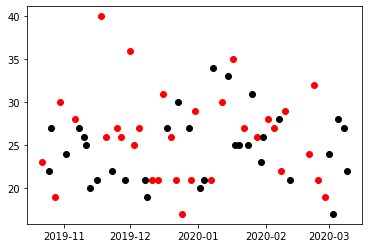

In [20]:
#Another analysis is on Raptors' assist in home and away games.

x = rb1['Date']
y = rb1['AST_home']

plt.scatter(x, y, c='red')

x = rb2['Date']
y = rb2['AST_away']

plt.scatter(x, y, c='black')

print(rb1['AST_home'].mean())
print(rb2['AST_away'].mean())

# The result shows that there is no obvious evidence to prove Raptors did better on assit in home game than away games.
# But the plot shows that Raptors have more high number of assist in home games 
# And the average number of assist in home game is 1.4 more than the away games. 

222.8928939237899
226.50819672131146
0.9217806385169922
0.9177049180327869


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexe

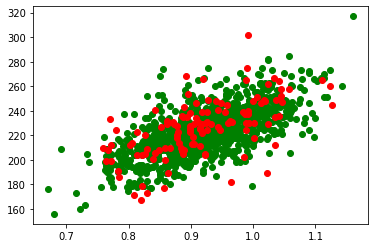

In [98]:
#One last analysis, did all the team performe better or worse after the covid shut down?
# Since play-off games are more compatitive, they should be eliminated from the gamedata


#First create a new df for the regular season games after covid shut down
dfafter1 = dfafter.loc[dfafter['Date'] <'8/17/20']

# then add a new column totalPTS as the combination of points from both home and away teams in a game.

dfbefore['totalPTS'] = dfbefore['PTS_home']+dfbefore['PTS_away'] 
dfbefore['totalFG'] = dfbefore['FG_PCT_home']+dfbefore['FG_PCT_away']

dfafter1['totalPTS'] = dfafter1['PTS_home'] + dfafter1['PTS_away'] 
dfafter1['totalFG'] = dfafter1['FG_PCT_home']+dfafter1['FG_PCT_away']

x = dfbefore['totalFG']
y = dfbefore['totalPTS']

plt.scatter(x, y, c='green')

x = dfafter1['totalFG']
y = dfafter1['totalPTS']

plt.scatter(x, y, c='red')

print(dfbefore['totalPTS'].mean())
print(dfafter1['totalPTS'].mean())

print(dfbefore['totalFG'].mean())
print(dfafter1['totalFG'].mean())
# The plot result shows that the teams after the shutdown score slightly better than before.   
# On average, each game after the shut down is about 3.7 points higher than the games before. 
# On average, each game after the shut down is about has a total Field Goal that is 0.4% less than before, but that difference is too small. 